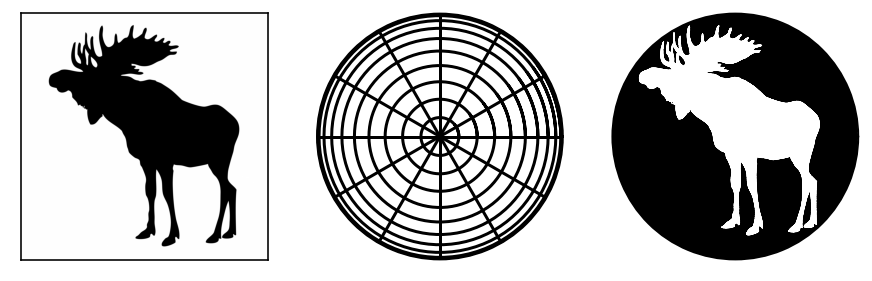

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from scipy.special import erf
import dedalus.public as d3

fig = plt.figure(figsize=(7.5, 3))
axs = []
axs.append(fig.add_subplot(1,3,1))
axs.append(fig.add_subplot(1,3,2, polar=True))
axs.append(fig.add_subplot(1,3,3, polar=True))

im0 = image.imread('moose_1920px.jpg')
axs[0].imshow(im0)


Ra = 1e10
Pr = 1
nu = np.sqrt(Pr/Ra)
Lx = 2
Nr = 1024
Nphi = 2*Nr
nx = Nr*2

dtype = np.float64
dealias = 3/2

coords = d3.PolarCoordinates('phi', 'r')
dist = d3.Distributor(coords, dtype=dtype)
basis = d3.DiskBasis(coords, shape=(Nphi, Nr), radius=1, dealias=dealias, dtype=dtype, azimuth_library='matrix')

phi, r = basis.local_grids()
theta = np.linspace(0, 2.2*np.pi, 100)
for rval in r[0,::100]:
    axs[1].plot(theta, rval*np.ones_like(theta), c='k')
rs = np.linspace(0, 1, 100)
N_theta = 12
for i in range(N_theta):
    theta = 2*np.pi*(i/N_theta)
    axs[1].plot(theta*np.ones_like(rs), rs, c='k')


import h5py
with h5py.File('../masks/moosinesq_Ra{:.1e}_{}x{}_de{:.1f}.h5'.format(Ra, Nr,Nphi,dealias), 'r') as f:
    mask_grid = f['mask'][()]
    r = f['r'][()]
    phi = f['phi'][()]

rr, pp = np.meshgrid(r, phi)
axs[2].pcolormesh(pp, rr, mask_grid, shading='auto', cmap='Greys', vmin=0, vmax=1)

for ax in axs[1:]:
    ax.set_rlim(0, 1)
    ax.set_rticks([])
for ax in axs:
    ax.set_xticks([])
axs[0].set_yticks([])
    
fig.savefig('paper_figure01.png', dpi=400, bbox_inches='tight')
#fig.savefig('paper_figure01.pdf', dpi=400, bbox_inches='tight')